As the newest member of a dynamic marketing consulting firm in Thailand, a country at the forefront of social media innovation, I have been tasked with a vital analytical endeavor. The instruction is unambiguous: explore the complex network of engagement patterns that characterize Thailand's thriving Facebook Live selling industry, which depends on the rapid nature of digital communication. Based on the widely accepted belief that visual material is the driving force behind social media interaction, our organization has always supported the extensive use of images to enthrall and stimulate. We hope to examine the validity of this claim with this analysis by delving into the complex behavior of images in comparison to other kinds of information. By utilizing a dataset that contains a diverse range of reactions, shares, and comments, my goal is to uncover insights that will either reinforce our present content strategy or steer us in the direction of more data-driven approaches.

In [1]:
# Importing libraries
import numpy as np                                          # mathematical essentials
import pandas as pd                                         # data science essentials
from sklearn.decomposition import PCA                       # principal component analysis
from sklearn.model_selection import train_test_split        # train-test split
from sklearn.preprocessing import StandardScaler            # data prep
from sklearn.metrics import confusion_matrix, roc_auc_score # results analysis
from scipy.cluster.hierarchy import dendrogram, linkage     # dendrograms
from sklearn.cluster         import KMeans                  # k-means clustering
import sklearn.linear_model                                 # classification modeling
import matplotlib.pyplot as plt
import seaborn as sns



# Importing data
file    = '/Users/vivi/Desktop/Introduction to Machine Learning & AI/facebook_live_data.xlsx'
fb = pd.read_excel(io = file)

# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# Checking results
fb.head(n = 5)

,status_id,status_type,time_published,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,photo,2023-07-04 22:45:00,0,0,150,0,0,0,0,0
1,2,photo,2023-06-23 01:01:00,2,3,202,7,1,0,0,0
2,3,photo,2023-06-21 02:23:00,4,0,200,8,1,0,0,0
3,4,video,2023-06-14 05:16:00,100,30,303,23,1,5,0,0
4,5,video,2023-06-08 08:28:00,173,47,132,16,1,0,1,0


In [2]:
# Checking information about each column
fb.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2362 entries, 0 to 2361
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   status_id       2362 non-null   int64         
 1   status_type     2362 non-null   object        
 2   time_published  2362 non-null   datetime64[ns]
 3   num_comments    2362 non-null   int64         
 4   num_shares      2362 non-null   int64         
 5   num_likes       2362 non-null   int64         
 6   num_loves       2362 non-null   int64         
 7   num_wows        2362 non-null   int64         
 8   num_hahas       2362 non-null   int64         
 9   num_sads        2362 non-null   int64         
 10  num_angrys      2362 non-null   int64         
dtypes: datetime64[ns](1), int64(9), object(1)
memory usage: 203.1+ KB


In [3]:
# Descriptive statistics about each numeric column
fb.describe(include = 'number').round(decimals = 2)

,status_id,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,2362.00,2362.00,2362.00,2362.00,2362.00,2362.00,2362.00,2362.00,2362.00
mean,1181.50,233.73,39.82,221.15,12.83,1.28,0.74,0.26,0.12
std,681.99,856.36,123.78,467.31,41.00,8.72,4.11,1.84,0.90
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,591.25,0.00,0.00,17.00,0.00,0.00,0.00,0.00,0.00
50%,1181.50,4.00,0.00,57.00,0.00,0.00,0.00,0.00,0.00
75%,1771.75,23.00,3.00,186.00,3.00,0.00,0.00,0.00,0.00
max,2362.00,10960.00,1260.00,4315.00,421.00,278.00,102.00,46.00,31.00


In [4]:
# Checking null value
fb.isnull().sum()

status_id         0
status_type       0
time_published    0
num_comments      0
num_shares        0
num_likes         0
num_loves         0
num_wows          0
num_hahas         0
num_sads          0
num_angrys        0
dtype: int64

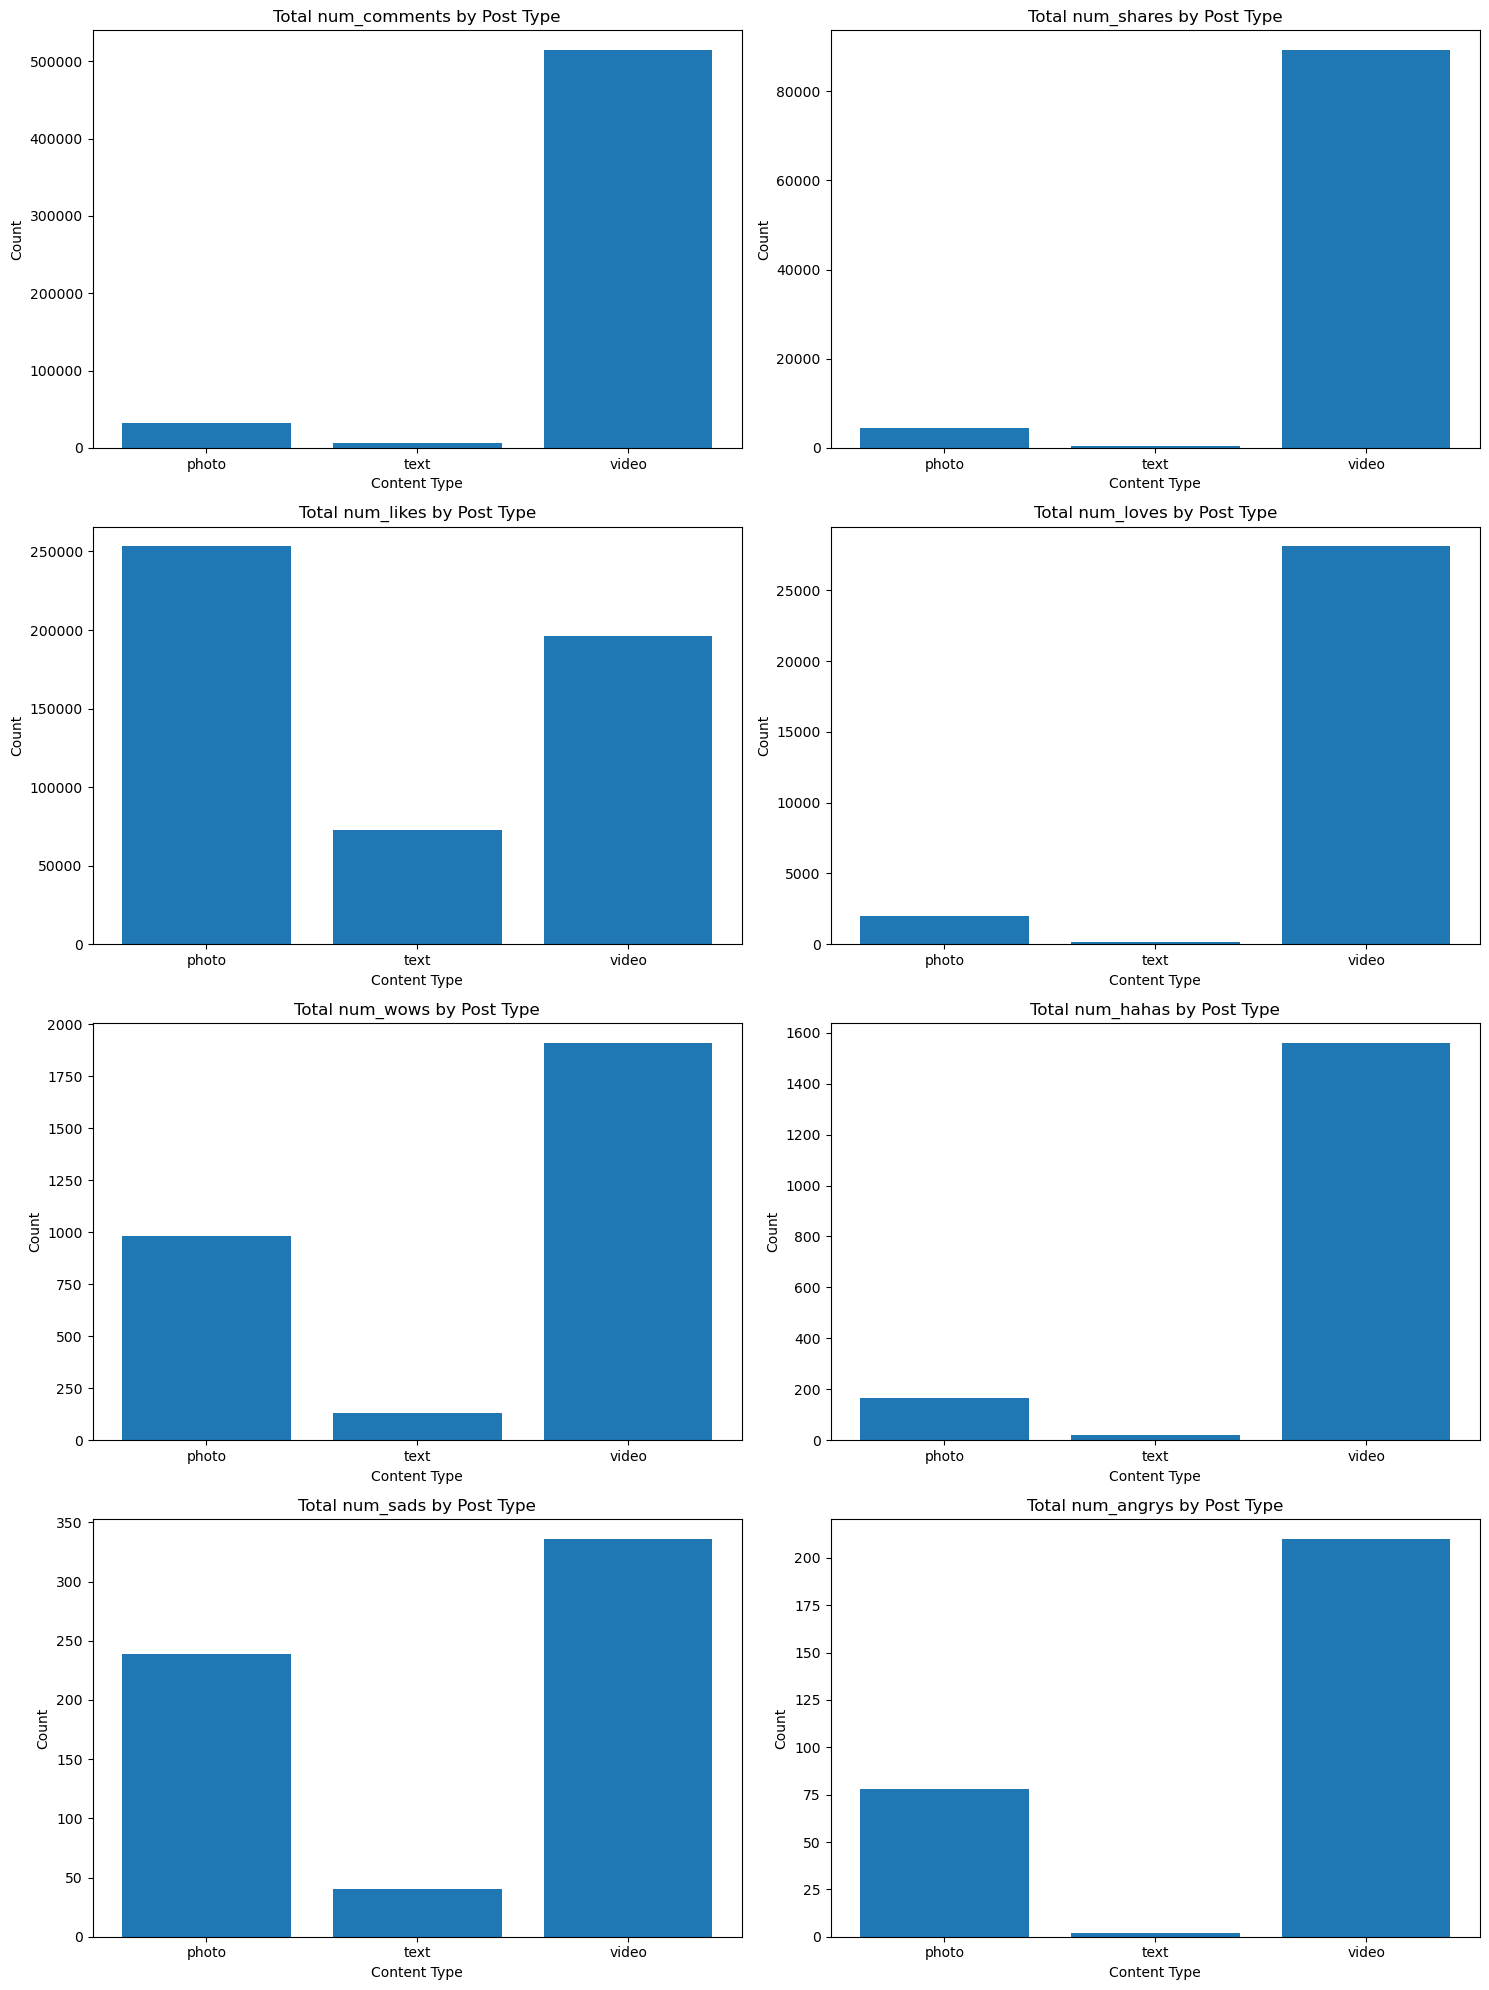

             num_comments  num_shares  num_likes  num_loves  num_wows  num_hahas  num_sads  num_angrys
status_type                                                                                           
photo               31796        4385     253180       2009       983        168       239          78
text                 5898         517      72918        189       134         20        40           2
video              514376       89158     196253      28100      1912       1560       336         210


In [5]:
# List of interaction types
interaction_types = ['num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']

# Group by post type and calculate total for each type of interaction
grouped_data = fb.groupby('status_type')[interaction_types].sum()

# Create the plots
num_cols = 2
num_rows = (len(interaction_types) + num_cols - 1) // num_cols

plt.figure(figsize=(15, 5 * num_rows))

for i, reaction in enumerate(interaction_types):
    # Create subplot, index starts at 1
    plt.subplot(num_rows, num_cols, i + 1)
    # Draw bar chart for current reaction type
    plt.bar(grouped_data.index, grouped_data[reaction])  
    plt.title(f'Total {reaction} by Post Type')  # Set chart title
    plt.ylabel('Count')  
    plt.xlabel('Content Type') 
    
plt.tight_layout()  # Automatically adjust subplot params to display the figure with specified padding
plt.show()   # Display the figure


print(grouped_data) # Print the grouped data

We can observe that every piece of material—text, video, and photo—elicits a distinct pattern of engagement by analyzing the provided dataset on various content types. Even though photos are quite powerful at getting likes, videos are more effective at getting comments, shares, loves, and "wow" reactions. Videos appear to generate a wider variety of responses, which could indicate that they are more successful in capturing viewers' attention on several different emotional levels. Text nevertheless has a big impact on user engagement even though it performs poorly across all reaction categories, maybe because written content is so effective at communicating ideas.
Largely liked photos appear to indicate a prompt, positive response from people, maybe because they are visually appealing and simple to view. However, videos receive more comments and shares than images do. This could mean that because videos are more dynamic and immersive than photos, they encourage greater user discussion and distribution.
Videos receive a significantly greater response when it comes to "loves," which may be because of their capacity to tell stories and elicit deeper emotional responses. Even still, text does not seem to evoke the same kind of emotional response as photos do.
The 'haha' reply is much more common for videos, usually implying humor or lighthearted content. This could imply that videos are more effective at providing lighthearted or humorous content that makes people laugh.
When it comes to'sad' and 'angry' reactions, pictures get more of a reaction than text, but videos still win out. This discrepancy would suggest that videos are better at delivering difficult, thought-provoking, or contentious material that can elicit these kinds of responses.
Overall, this study can offer marketers and content producers insightful information. Videos are more effective in generating most sorts of engagement, including emotional reactions, even though photographs are still a great candidate for likes. Comprehending these trends can aid in developing focused content tactics to optimize interaction on social media networks.

In [6]:
########################################
# scree_plot
########################################
def scree_plot(pca_object, cut_off=None, export=False):
    """
    Visualizes a scree plot from a pca object and adds a vertical line
    at the cut-off point.
    
    PARAMETERS
    ----------
    pca_object | A fitted pca object
    cut_off    | The index to draw a vertical line (None if no cut-off)
    export     | Set to True if you would like to save the scree plot to the
               | current working directory (default: False)
    """
    # building a scree plot
    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)

    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth=2,
             marker='o',
             markersize=10,
             markeredgecolor='black',
             markerfacecolor='grey')

    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    # if a cut-off point was provided, add a vertical line
    if cut_off is not None:
        plt.axvline(x=cut_off, color='red', linestyle='--', label='Cut-off point')
        plt.legend()

    if export:
        # exporting the plot
        plt.savefig('./analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()

########################################
# unsupervised_scaler
########################################
def scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler(copy = True)


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = list(df.columns)
    
    return new_df

In [7]:
fb['is_photo'] = (fb['status_type'] == 'photo').astype(int)

In [8]:
# Removing demographic data
fb_df = fb.drop(['status_id','status_type', 'time_published','is_photo'], axis = 1)


# Scaling (normalizing) variables before correlation analysis
fb_scaled = scaler(df = fb_df)


# Checking pre- and post-scaling variance
print(np.var(fb_df), '\n\n')
print(np.var(fb_scaled))

num_comments    733040.526533
num_shares       15315.110634
num_likes       218288.813477
num_loves         1680.086166
num_wows            75.978259
num_hahas           16.896863
num_sads             3.392409
num_angrys           0.817271
dtype: float64 


num_comments    1.0
num_shares      1.0
num_likes       1.0
num_loves       1.0
num_wows        1.0
num_hahas       1.0
num_sads        1.0
num_angrys      1.0
dtype: float64


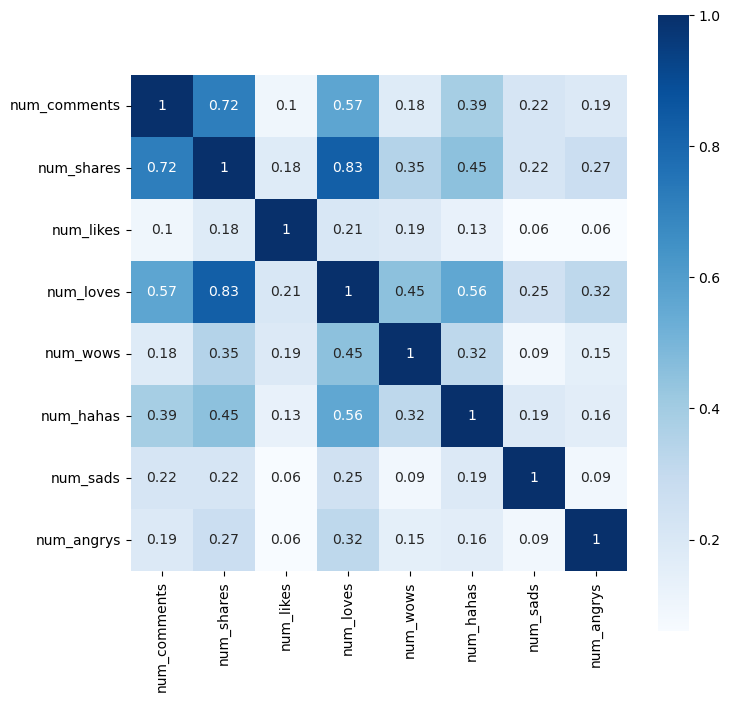

In [9]:
# Setting plot size
fig, ax = plt.subplots(figsize = (8, 8))


# Developing a correlation matrix object
df_corr = fb_scaled.corr(method = 'pearson').round(decimals = 2)


# Creating a correlation heatmap
sns.heatmap(data   = df_corr,
            cmap   = 'Blues',
            square = True,
            annot  = True)


# Rendering the heatmap
plt.show()

In [10]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None,
          random_state = 702)


# FITTING and TRANSFORMING the scaled data
fb_pca = pca.fit_transform(fb_scaled)


# comparing dimensions of each DataFrame
print("Original shape:", fb_scaled.shape)
print("PCA shape     :", fb_pca.shape)

Original shape: (2362, 8)
PCA shape     : (2362, 8)


In [11]:
# Component number counter
component_number = 0


# Looping over each principal component
for variance in pca.explained_variance_ratio_:
    component_number += 1
    print(f"PC {component_number}: {variance.round(3)}")

PC 1: 0.409
PC 2: 0.128
PC 3: 0.115
PC 4: 0.11
PC 5: 0.1
PC 6: 0.077
PC 7: 0.045
PC 8: 0.017


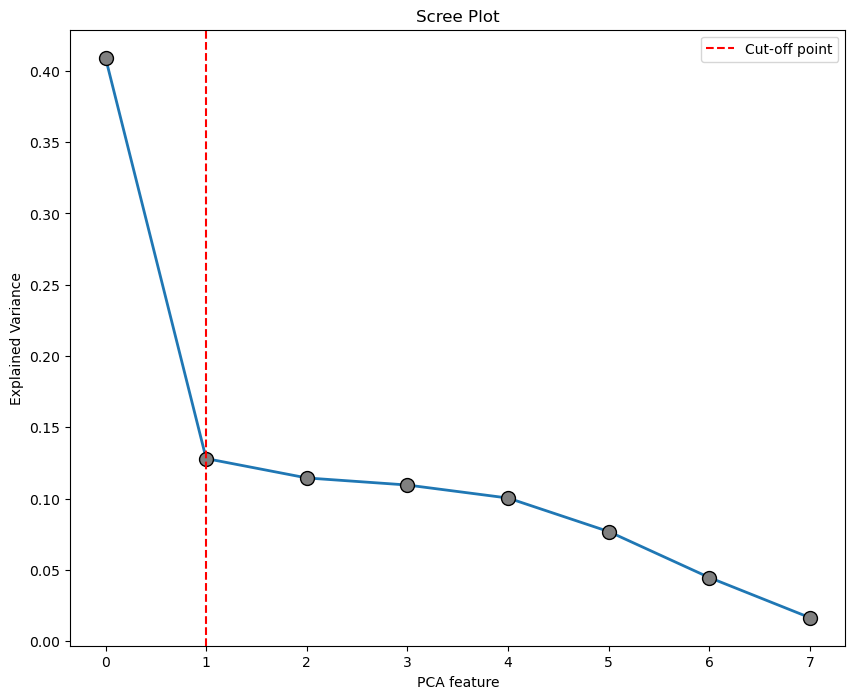

In [12]:
# Calling the scree_plot function
scree_plot(pca_object=pca, cut_off=1)

The scree plot that is presented makes it clear that the first principle component explains a substantial amount of the variance, with each succeeding component explaining progressively less of the variance. A popular method for determining how many components to keep is to locate a "elbow" in the scree plot, which is the point at which the marginal gain in explained variance becomes notably less. Here, the first principal component clearly captures the majority of the information as the explained variance clearly decreases following it. Further components exhibit decreasing results, whereas the second primary component still contains some useful information. Given that the two principal components combined capture the majority of the dataset's variability and prevent overfitting and the curse of dimensionality (Abid Ali Awan, 2023), it is reasonable to keep them in this particular case. While the second component offers more insights and contributes to a more thorough knowledge of the data, the first component captures the most significant variation in the data. In this context, retaining two principal components seems to be a justified decision as they together retain most of the variability in the dataset while avoiding overfitting and the curse of dimensionality. The first component captures the most significant variation in the data, while the second component provides additional insights, which helps in a more comprehensive understanding of the data.

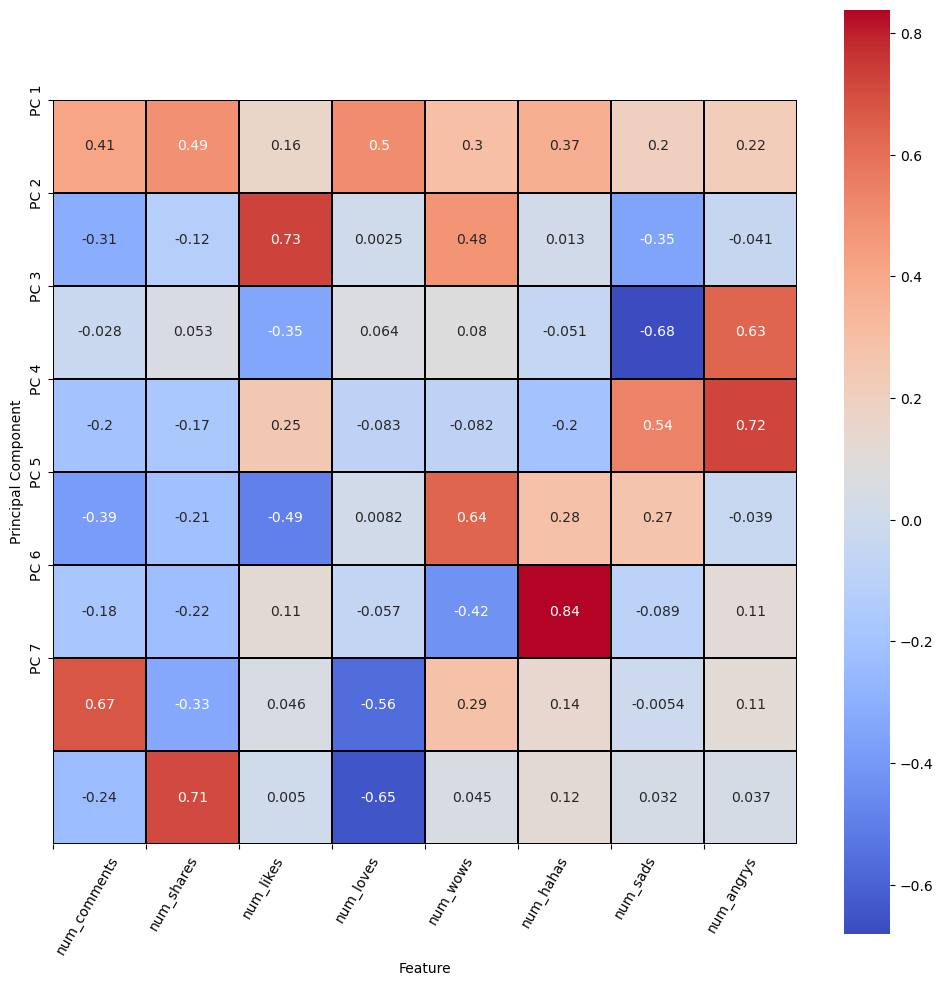

In [13]:
# Setting plot size
fig, ax = plt.subplots(figsize = (12, 12))


# Developing a PC to feature heatmap
sns.heatmap(pca.components_, 
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linewidths = 0.1,
            linecolor = 'black')


# Setting more plot options
plt.yticks([0, 1, 2, 3, 4, 5, 6],
           ["PC 1", "PC 2", "PC 3", "PC 4", "PC 5", "PC 6","PC 7"])

plt.xticks(range(len(fb_scaled.columns)), fb_scaled.columns, rotation=60, ha='left')


plt.xlabel(xlabel = "Feature")
plt.ylabel(ylabel = "Principal Component")


# Displaying the plot
plt.show()

In [14]:
# Transposing pca components
factor_loadings_df = pd.DataFrame(np.transpose(pca.components_.round(decimals = 2)))


# Naming rows as original features
factor_loadings_df = factor_loadings_df.set_index(fb_scaled.columns)


# Checking the result
print(factor_loadings_df)

                 0     1     2     3     4     5     6     7
num_comments  0.41 -0.31 -0.03 -0.20 -0.39 -0.18  0.67 -0.24
num_shares    0.49 -0.12  0.05 -0.17 -0.21 -0.22 -0.33  0.71
num_likes     0.16  0.73 -0.35  0.25 -0.49  0.11  0.05  0.00
num_loves     0.50  0.00  0.06 -0.08  0.01 -0.06 -0.56 -0.65
num_wows      0.30  0.48  0.08 -0.08  0.64 -0.42  0.29  0.04
num_hahas     0.37  0.01 -0.05 -0.20  0.28  0.84  0.14  0.12
num_sads      0.20 -0.35 -0.68  0.54  0.27 -0.09 -0.01  0.03
num_angrys    0.22 -0.04  0.63  0.72 -0.04  0.11  0.11  0.04


In [15]:
# Converting into a DataFrame 
fb_pca = pd.DataFrame(fb_pca)


# Renaming columns
fb_pca.columns = factor_loadings_df.columns


# Checking results
fb_pca

,0,1,2,3,4,5,6,7
0,-0.619670,-0.006476,0.031211,-0.028140,0.069438,0.030553,0.011254,-0.000399
1,-0.469623,0.126667,0.013848,-0.028868,0.082735,-0.020934,-0.053784,-0.088186
2,-0.469004,0.125796,0.015559,-0.028346,0.089355,-0.017813,-0.058132,-0.121798
3,0.367677,0.240069,-0.089732,-0.314233,0.234662,0.932251,-0.089207,-0.068756
4,-0.019679,-0.278149,-0.276109,0.109002,0.151739,-0.213950,-0.170986,-0.007108
...,...,...,...,...,...,...,...,...
2357,-0.430884,0.084652,-0.004706,-0.030780,-0.039773,0.007068,-0.111433,-0.051283
2358,-0.667096,-0.222189,0.133994,-0.100760,0.215334,-0.003407,-0.002229,-0.001872
2359,-0.668470,-0.228442,0.136973,-0.102865,0.219563,-0.004391,-0.002620,-0.001914
2360,-0.669158,-0.231568,0.138463,-0.103917,0.221677,-0.004884,-0.002815,-0.001936


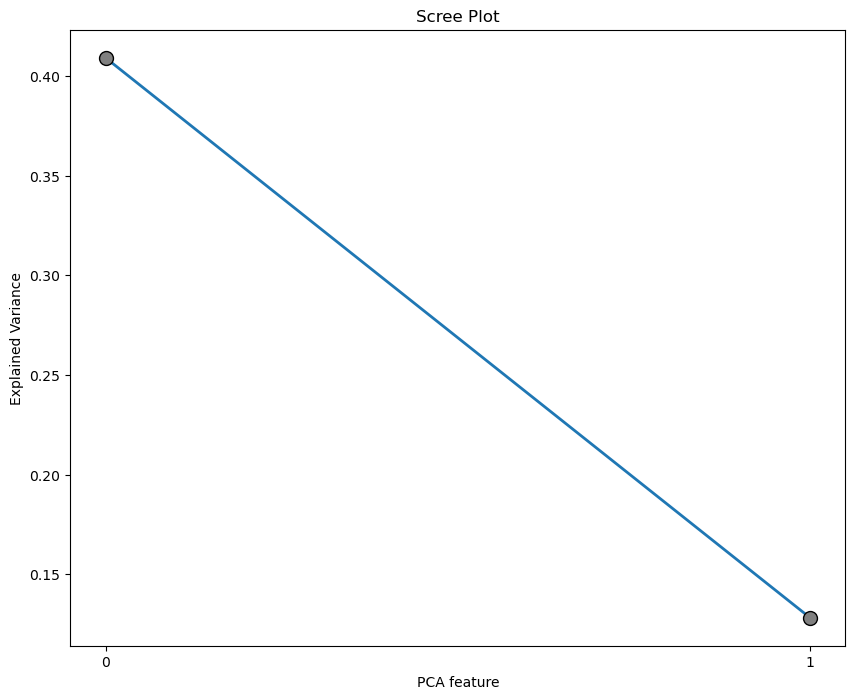

In [16]:
# INSTANTIATING a new model using the first three principal components
pca_2 = PCA(n_components = 2,
            random_state = 702)


# FITTING and TRANSFORMING the fb_scaled
fb_pca_2 = pca_2.fit_transform(fb_scaled)


# Calling the scree_plot function
scree_plot(pca_object = pca_2,
           export     = False)

In [17]:
####################
### Max PC Model ###
####################
# Transposing pca components (pc = MAX)
factor_loadings = pd.DataFrame(np.transpose(pca.components_))


# naming rows as original features
factor_loadings = factor_loadings.set_index(fb_scaled.columns)


##################
### 3 PC Model ###
##################
# Transposing pca components (pc = 3)
factor_loadings_2 = pd.DataFrame(np.transpose(pca_2.components_))


# Naming rows as original features
factor_loadings_2 = factor_loadings_2.set_index(fb_scaled.columns)


# Checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{factor_loadings.round(decimals = 2)}


2 Components Factor Loadings
------------------------------
{factor_loadings_2.round(decimals = 2)}
""")


MAX Components Factor Loadings
------------------------------
                 0     1     2     3     4     5     6     7
num_comments  0.41 -0.31 -0.03 -0.20 -0.39 -0.18  0.67 -0.24
num_shares    0.49 -0.12  0.05 -0.17 -0.21 -0.22 -0.33  0.71
num_likes     0.16  0.73 -0.35  0.25 -0.49  0.11  0.05  0.00
num_loves     0.50  0.00  0.06 -0.08  0.01 -0.06 -0.56 -0.65
num_wows      0.30  0.48  0.08 -0.08  0.64 -0.42  0.29  0.04
num_hahas     0.37  0.01 -0.05 -0.20  0.28  0.84  0.14  0.12
num_sads      0.20 -0.35 -0.68  0.54  0.27 -0.09 -0.01  0.03
num_angrys    0.22 -0.04  0.63  0.72 -0.04  0.11  0.11  0.04


2 Components Factor Loadings
------------------------------
                 0     1
num_comments  0.41 -0.31
num_shares    0.49 -0.12
num_likes     0.16  0.73
num_loves     0.50  0.00
num_wows      0.30  0.48
num_hahas     0.37  0.01
num_sads      0.20 -0.35
num_angrys    0.22 -0.04



In [18]:
# Naming each principal component
factor_loadings_2.columns = ['User Interaction', # - comments, - shares, - num_loves
                             'Positive Sentiment']  # - num_likes
                          

# Checking the result
factor_loadings_2.round(decimals = 2)

,User Interaction,Positive Sentiment
num_comments,0.41,-0.31
num_shares,0.49,-0.12
num_likes,0.16,0.73
num_loves,0.50,0.00
num_wows,0.30,0.48
num_hahas,0.37,0.01
num_sads,0.20,-0.35
num_angrys,0.22,-0.04


Principal Component 0: User Interaction
It is clear from PC0's strong correlation with "num shares", "num_loves" and "num comments" that it measures user engagement with social media material. High scores for this statistic indicate that the material is effective in drawing people in, probably because it is thought-provoking, timely, or emotionally relevant, which encourages users to share and leave comments. On the other hand, content that lies below PC0 is typically less engaging or does not personally connect with the viewer, which leads to a dearth of shares and comments. This suggests that the topic in question is either not relevant or appealing enough, or it is ineffective at promoting active involvement. Thus, PC0 effectively measures the spectrum of audience engagement, distinguishing between content that activates community involvement and content that passes unnoticed or unengaged with by the users.

Principal Component 1: Positive Sentiment
PC1 has a strong positive loading on 'num_likes,' suggesting that it is useful for estimating how well social media posts are received overall. According to this, content that scores highly on PC1 typically provokes positive emotions, which increases the amount of likes it receives. This kind of content is probably going to be upbeat, appealing to a wide range of people, and free of contentious or divisive themes, which is consistent with the finding that higher scores on this component are linked to fewer 'num_comments' and 'num_sads'. On the other side, the negative loadings of 'num_comments' and 'num_sads' on PC1 highlight that content lower on this component tends to invoke more complex emotions or controversy, leading to more discussions and expressions of sadness. Therefore, PC1 effectively separates content that is easily digestible and widely appreciated from that which is likely to be contentious, challenging, or somber, prompting a deeper level of engagement through comments or sad reactions.


In [19]:
# Checking variance amongst clusters
np.var(factor_loadings_2)

User Interaction      0.015220
Positive Sentiment    0.122464
dtype: float64

In [20]:
# Applying the unsupervised_scaler function
pca_rescaled = scaler(df = factor_loadings_2)


# Checking pre- and post-scaling variance
print(np.var(factor_loadings_2), '\n\n')
print(np.var(pca_rescaled))

User Interaction      0.015220
Positive Sentiment    0.122464
dtype: float64 


User Interaction      1.0
Positive Sentiment    1.0
dtype: float64


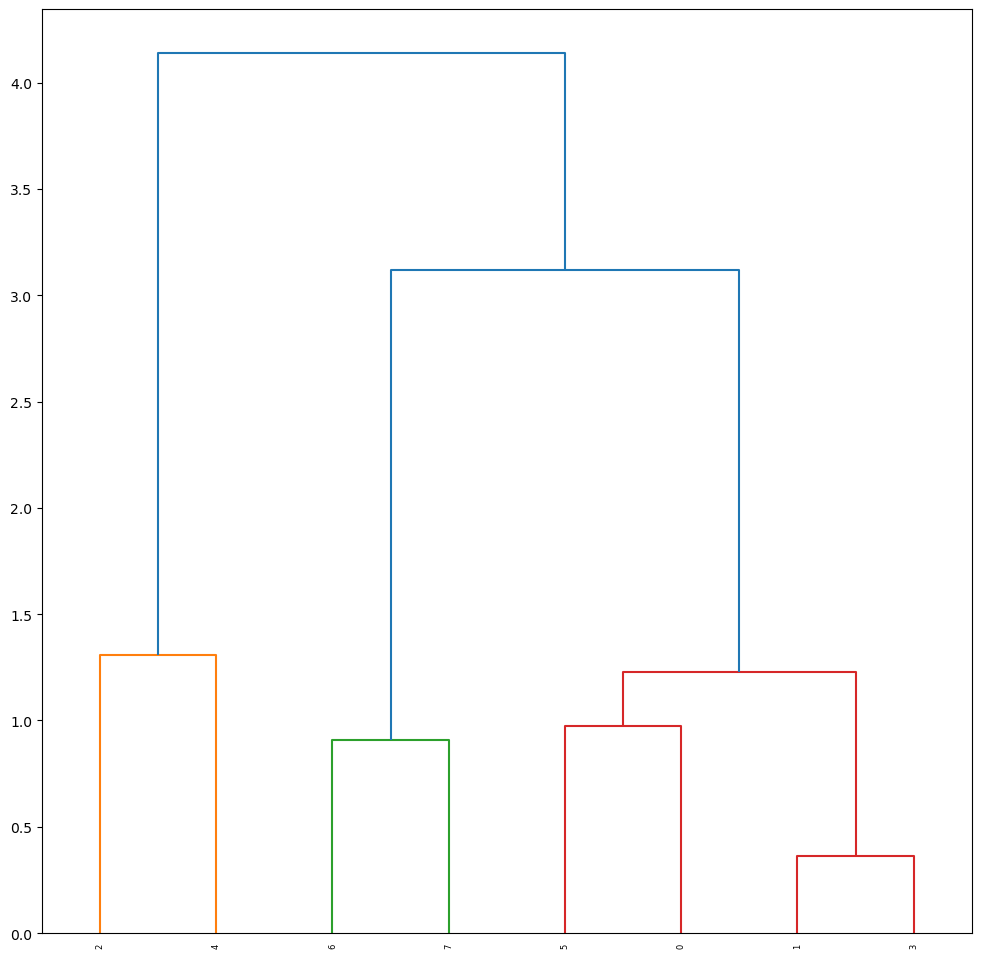

In [21]:
# Grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_rescaled,
                                 method = 'ward',
                                 optimal_ordering = True)


# Setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# Developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation  = 90       ,
           leaf_font_size = 6        )


# Rendering the plot
plt.show()

In [22]:
# INSTANTIATING a k-Means object with clusters
customers_k_pca = KMeans(n_clusters   = 3 ,
                         n_init       = 'auto',
                         random_state = 702   )


# Fitting the object to the data
customers_k_pca.fit(pca_rescaled)


# Converting the clusters to a DataFrame
customers_kmeans_pca = pd.DataFrame({'Cluster': customers_k_pca.labels_})


# Checking the results
print(customers_kmeans_pca.iloc[: , 0].value_counts())

Cluster
0    4
1    2
2    2
Name: count, dtype: int64


In order to get the best number of clusters for data analysis, one needs to take into account both the statistical signals and the usefulness of the data. The dendrogram's three significant branches imply that the data naturally fell into three different groupings. The idea that three clusters are plenty to adequately depict the underlying patterns is supported by this depiction.
Additionally, each cluster's cohesiveness should be optimized, and there should be a clear and significant division between them. We can clearly distinguish between the three clusters and classify the data into easily understood categories without overly complicating the model.
The selection of the three clusters can be particularly helpful from a business standpoint. It makes sense to divide social media interactions into three categories: high, medium, and low interaction levels. This categorization makes customized marketing initiatives possible and streamlines the strategic approach to interaction.
Furthermore, one should not undervalue the manageability of data interpretation. An analysis becomes more complex when there are too many clusters, which could produce unclear conclusions that are hard to interpret into useful business decisions. Three clusters keep practicality and detail in check. Finally, choosing the right number of clusters also depends on the scale and diversity of the data. In this case, three clusters seem to capture the essential structure of the data effectively, providing a robust framework for further analysis and decision-making in the context of social media interaction patterns.

In [23]:
# Storing cluster centers
centroids_pca = customers_k_pca.cluster_centers_


# Converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca).round(decimals = 2)


# Renaming principal components
centroids_pca_df.columns = ['User Interaction',
                            'Positive Sentiment']


# Checking results (clusters = rows, pc = columns)
centroids_pca_df

,User Interaction,Positive Sentiment
0,0.91,-0.44
1,-0.84,1.59
2,-0.98,-0.71


A high "User Interaction" score (0.91) and a low "Positive Sentiment" score (-0.44) define Cluster 0. This implies that posts in this category, which reflect content interesting enough to elicit user interaction, are successful in drawing people into debates and sharing activities. The negative sentiment score, however, suggests that these interactions may not be related to content that arouses favorable feelings, but rather may entail neutral or even contentious subjects that encourage discussion. An article that stimulates discussion or an issue that begs for argument might be considered a typical post because they prioritize intellectual discussion above emotional involvement. Such content might include a call to action, asking for opinions or experiences, which tend to drive comments and shares without necessarily generating a lot of positive emojis.

Posts in Cluster 1 clearly resonate on an emotional level, as seen by their low 'User Interaction' score (-0.84) and relatively high 'Positive Sentiment' score (1.59), which primarily results in 'likes' or 'loves' from users. These high sentiment scores correspond to content that constantly makes a good impression on the audience, even if it doesn't necessarily provoke strong opinions or a lot of sharing. This cluster usually consists of inspirational autobiographies, endearing animal videos, or funny memes that inspire rapid emoji emotions, such smiles or hearts, which signify happiness or laughter. These postings might be well received, but they might not spark more interaction in the form of in-depth remarks or debates since they are too simple or generally relatable. Consequently, while these posts are a rich source of positive sentiment, their lower interaction scores suggest they are less likely to foster community engagement or become catalysts for conversations.

Cluster 2 postings indicate a lack of audience engagement and emotional connection, as seen by their low 'User Interaction' score (-0.98) and 'Positive Sentiment' score (-0.71). The material probably consists of updates or educational articles that, although they might be useful, don't encourage consumers to engage or express a lot of gratitude. A quick news article or instructional post that receives little user interaction is a good example of a Cluster 2 post. The scores' indication of passive consumption may be the consequence of the content's perceived overuse of utilitarianism or absence of a human touch that could encourage interaction. To enhance interaction and sentiment, content creators may need to consider adding elements that personalize or add a story element to these types of posts, aiming to transform passive viewers into active participants.

Cluster 0 Discussion Catalysts :
Cluster 0's high "User Interaction" score suggests that photos in this segment are likely thought-provoking or relate to current events, which drives user comments and shares. However, the low "Positive Sentiment" score indicates that while these images may engage users, they do not necessarily generate positive emotions; they might be hard-hitting or serious in nature. A typical photo in this segment could be a compelling infographic or a news-related image that prompts discussions and elicits diverse opinions, leading to higher interaction but mixed sentiment reactions.

Cluster 1 Feel-Good Content : 
Cluster 1's low "User Interaction" and high "Positive Sentiment" indicate that most of the photographs in this cluster are amusing or heartwarming, garnering a lot of "likes" but not as many comments or shares. These could be funny comics, pictures of adorable animals, or motivational sayings set against beautiful scenery. These kinds of images are simple to understand and elicit immediate favorable responses, but they rarely promote in-depth conversation or involvement.


Cluster 2 Informational Browsing : 
The fact that Cluster 2 scored poorly on both dimensions suggests that images may not be the main focus of engagement but rather serve to supplement instructional or informative text. Charts, graphs, and other supplemental images from news items that complement the text rather than acting as a stand-alone source of interaction or emotion may be included as images in this section. Although this kind of information usually doesn't elicit strong responses or interactions from readers, it is probably instructive and valuable.

<strong>Model 1: Original x-features</strong>

In [24]:
# Subsetting continuous data
fb_continuous = fb[ ['num_comments', 'num_shares', 'num_likes',
                     'num_loves', 'num_wows', 'num_hahas',
                     'num_sads', 'num_angrys'] ]


# Scaling the data
fb_continuous = scaler(df = fb_continuous)

In [25]:
# Selecting x- and y-data
x_data = fb_continuous
y_data = fb['is_photo']


# Training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                    y_data,
                                                    test_size    = 0.25,
                                                    random_state = 702,
                                                    stratify     = y_data)

In [26]:
# INSTANTIATING a logistic regression model
model = sklearn.linear_model.LogisticRegression(solver       = 'lbfgs',
                                                C            = 1,
                                                random_state = 702)


# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model_fit.predict(x_test) # predict_proba for multiclass


# Checking results
train_acc = model_fit.score(x_train, y_train)
test_acc  = model_fit.score(x_test , y_test )
roc_score = roc_auc_score  (y_true      = y_test,
                            y_score     = model_pred)


print(f"""
Train-Test Gap: {round(abs(train_acc - test_acc), ndigits = 3)}
Test AUC Score: {roc_score.round(decimals = 3)}
""")


Train-Test Gap: 0.014
Test AUC Score: 0.678



In [27]:
# Unpacking the confusion matrix   (Model 1: Original x-features)
model_tn, \
model_fp, \
model_fn, \
model_tp = confusion_matrix(y_true = y_test, y_pred = model_pred).ravel()


# Printing each result one-by-one
print(f"""
True Negatives : {model_tn}
False Positives: {model_fp}
False Negatives: {model_fn}
True Positives : {model_tp}
""")


True Negatives : 91
False Positives: 139
False Negatives: 14
True Positives : 347



<strong>Model 2: Retained principal components (Best Model)</strong>

In [28]:
# INSTANTIATING a PCA object
pca = PCA(n_components = 2,
          random_state = 702)


# Preparing factor loadings
fb_pca = pca.fit_transform(fb_continuous)

In [29]:
# Selecting x- and y-data
x_data = fb_pca
y_data = fb['is_photo']


# Training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                    y_data,
                                                    test_size    = 0.25,
                                                    random_state = 702,
                                                    stratify     = y_data)

In [30]:
# INSTANTIATING a logistic regression model
model = sklearn.linear_model.LogisticRegression(solver       = 'lbfgs',
                                                C            = 1,
                                                random_state = 702)


# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model_fit.predict(x_test) # predict_proba for multiclass


# Checking results
train_acc = model_fit.score(x_train, y_train)
test_acc  = model_fit.score(x_test , y_test )
roc_score = roc_auc_score  (y_true      = y_test,
                            y_score     = model_pred)


print(f"""
Train-Test Gap: {round(abs(train_acc - test_acc), ndigits = 3)}
Test AUC Score: {roc_score.round(decimals = 3)}
""")


Train-Test Gap: 0.008
Test AUC Score: 0.663



The rationale for choosing Model 2 as the best model is based on its impressive train-test gap and its balanced performance as indicated by the AUC score. A low train-test gap of 0.008 suggests the model has excellent generalizability and is not overfitting the data. Although the AUC score is slightly lower than Model 1, it still indicates a good ability to distinguish between the classes, with a score of 0.663. The confusion matrix shows that while there is an increase in false positives compared to Model 1, the number of true positives is also higher, which could indicate that while the model may overpredict at times, it captures more of the positive cases. Additionally, the relatively low number of false negatives suggests that the model is effectively identifying the majority of true positive cases, which is critical in avoiding the risk of missing potential engagements.

In [31]:
# Unpacking the confusion matrix (Model 2: Retained principal components)
model_tn, \
model_fp, \
model_fn, \
model_tp = confusion_matrix(y_true = y_test, y_pred = model_pred).ravel()


# Printing each result one-by-one
print(f"""
True Negatives : {model_tn}
False Positives: {model_fp}
False Negatives: {model_fn}
True Positives : {model_tp}
""")


True Negatives : 82
False Positives: 148
False Negatives: 11
True Positives : 350



True Negatives: Posts correctly identified as not photos (82). For the business, this means accurately recognizing content that should not be classified as photo-based, preventing inappropriate strategy advice. False Positives: Non-photo posts incorrectly labeled as photos (148). This could lead to a misallocation of marketing resources toward less engaging content. False Negatives: Photo posts incorrectly labeled as not photos (11). This is particularly risky as it could result in missing out on promoting content that is likely to engage the audience. True Positives: Posts correctly identified as photos (350). This is vital for reinforcing the strategy of promoting photo content, as these posts are likely to generate more engagement. In summary, Model 2 minimizes the risk of missing engaging photo content while maintaining a robust distinction capability, making it suitable for guiding content strategy decisions in a marketing context.

<strong>Model 3: Retained clusters</strong>

In [32]:
# Standardizing the data for clustering
pca_rescaled = scaler(df = pd.DataFrame(data = fb_pca))


# INSTANTIATING a k-Means object with clusters
customers_k_pca = KMeans(n_clusters   = 3 ,
                         n_init       = 'auto',
                         random_state = 702   )


# Fitting the object to the data
customers_k_pca.fit(pca_rescaled)


# Converting the clusters to a DataFrame
customers_kmeans_pca = pd.DataFrame({'Cluster': customers_k_pca.labels_})


# Checking cluster populations
print(customers_kmeans_pca.iloc[: , 0].value_counts())

Cluster
1    2112
0     135
2     115
Name: count, dtype: int64


In [33]:
# Checking which observations belong to each cluster
customers_kmeans_pca.head(n = 5)

,Cluster
0,1
1,1
2,1
3,1
4,1


In [34]:
# Factorizing cluster results 
cluster_df = pd.get_dummies(data       = customers_kmeans_pca['Cluster'],
                            drop_first = True).astype(dtype = int)


# Checking results
cluster_df.value_counts(normalize = False).sort_index(ascending = False)

1  2
1  0    2112
0  1     115
   0     135
Name: count, dtype: int64

In [35]:
# Selecting x- and y-data
x_data = cluster_df
y_data = fb['is_photo']


# Training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                    y_data,
                                                    test_size    = 0.25,
                                                    random_state = 702,
                                                    stratify     = y_data)

In [36]:
# INSTANTIATING a logistic regression model
model = sklearn.linear_model.LogisticRegression(solver       = 'lbfgs',
                                                C            = 1,
                                                random_state = 702)


# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model_fit.predict(x_test) # predict_proba for multiclass


# Checking results
train_acc = model_fit.score(x_train, y_train)
test_acc  = model_fit.score(x_test , y_test )
roc_score = roc_auc_score  (y_true  = y_test,
                            y_score = model_pred)


print(f"""
Train-Test Gap: {round(abs(train_acc - test_acc), ndigits = 3)}
Test AUC Score: {round(roc_score, ndigits = 3)}
""")


Train-Test Gap: 0.013
Test AUC Score: 0.544



In [37]:
# Storing cluster centers
centroids_pca = pd.DataFrame(data = customers_k_pca.cluster_centers_)


# Checking cluster centers
centroids_pca.round(decimals = 2)

,0,1
0,0.43,2.94
1,-0.21,-0.12
2,3.36,-1.27


In [38]:
# Unpacking the confusion matrix (Model 3: Retained clusters)
model_tn, \
model_fp, \
model_fn, \
model_tp = confusion_matrix(y_true = y_test, y_pred = model_pred).ravel()


# Printing each result one-by-one
print(f"""
True Negatives : {model_tn}
False Positives: {model_fp}
False Negatives: {model_fn}
True Positives : {model_tp}
""")


True Negatives : 23
False Positives: 207
False Negatives: 4
True Positives : 357



References
Abid Ali Awan. (2023, September). The Curse of Dimensionality in Machine Learning: Challenges, Impacts, and Solutions. Datacamp. https://www.datacamp.com/blog/curse-of-dimensionality-machine-learning